# 利用 OpenCV 实现基于 PCA 算法的人脸识别

PCA算法
总结⼀下PCA的算法步骤：
设有m条n维数据。
1）将原始数据按列组成n⾏m列矩阵X
2）将X的每⼀⾏（代表⼀个属性字段）进⾏零均值化，即减去这⼀⾏的均值
3）求出协⽅差矩阵
4）求出协⽅差矩阵的特征值及对应的特征向量
5）将特征向量按对应特征值⼤⼩从上到下按⾏排列成矩阵，取前k⾏组成矩阵P
6）Y=PX即为降维到k维后的数据

### 人脸图像标准化处理
将待训练的样本图像进行标准化处理，去除背景信息，并进行人脸中心化处理，最终转化成尺寸一致的人脸图像（一般是灰度图像）。手标很麻烦，可以利用人脸检测，将人脸矩形区域提取出来。

### 构造训练样本
设一张人脸图像尺寸为m*n，则将像素按列排开，在转置一下得到1行   列的一个人脸样本，在统计学中也叫一次观测或记录，有个变量或字段，因为很大，变量的维度很高，直接处理计算复杂，且没有必要，因为这些变量肯定有相关信息。

### 零均值
求出平均脸，将trainSamples每行减去meanFace，得到zeroMeanTrainSamples

### 求协方差矩阵
当然也可以采用SVD，奇异特征值分解的方法求。

### 求协方差矩阵的特征值、特征向量
求cov特征值D、特征向量，并单位化正交化，得到特征向量V。按贡献率从高到地重新排序。取前P个特征值，特征向量。得到投影矩阵

### 求零均值人脸样本的投影
得到特征脸

### 求测试样本的零均值人脸样本并求特征脸

### 对训练样本特征脸，测试样本特征脸构造距离矩阵
按照最临近原则归类

In [17]:
# 导入所需模块
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
# plt显示灰度图片
def plt_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()
    
# 读取一个文件夹下的所有图片，输入参数是文件名，返回文件地址列表
def read_directory(directory_name):
    faces_addr = []
    for filename in os.listdir(directory_name):
        faces_addr.append(directory_name + "/" + filename)
    return faces_addr

# 读取所有人脸文件夹,保存图像地址在列表中
faces = []
for i in range(1,40):
    faces_addr = read_directory('face_database/att_face/s'+str(i))
    for addr in faces_addr:
        faces.append(addr)
# 读取图片数据,生成列表标签
images = []
labels = []
for index,face in enumerate(faces):
    image = cv2.imread(face,0)
    images.append(image)
    labels.append(int(index/10+1))
print(len(labels))
print(len(images))
print(type(images[0]))
print(labels)

390
390
<class 'numpy.ndarray'>
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 2

(10304,)
<class 'numpy.ndarray'>
(390, 10304)


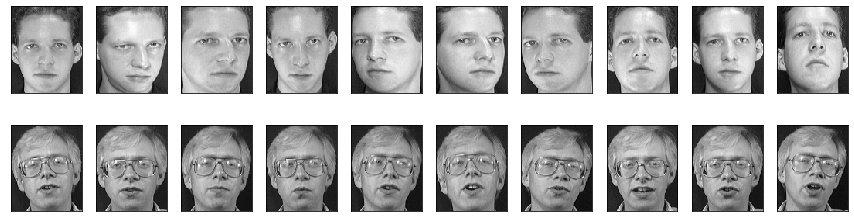

In [19]:
# 画出最后两组人脸图像
#创建画布和子图对象
fig, axes = plt.subplots(2,10
                       ,figsize=(15,4)
                       ,subplot_kw = {"xticks":[],"yticks":[]} #不要显示坐标轴
                       )
#填充图像
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i],cmap="gray") #选择色彩的模式
    
# 图像数据转换特征矩阵
image_data = []
for image in images:
    data = image.flatten()
    image_data.append(data)
print(image_data[0].shape)

# 转换为numpy数组
X = np.array(image_data)
y = np.array(labels)
print(type(X))
print(X.shape)

In [ ]:
# 导入sklearn的pca模块
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 画出特征矩阵
import pandas as pd
data = pd.DataFrame(X)
data.head()

# 划分数据集
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.2)
# 训练PCA模型
pca=PCA(n_components=100)
pca.fit(x_train)
PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
# 返回测试集和训练集降维后的数据集
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print(x_train_pca.shape)
print(x_test_pca.shape)

V = pca.components_
V.shape

# 100个特征脸
#创建画布和子图对象
fig, axes = plt.subplots(10,10
                       ,figsize=(15,15)
                       ,subplot_kw = {"xticks":[],"yticks":[]} #不要显示坐标轴
                       )
#填充图像
for i, ax in enumerate(axes.flat):
    ax.imshow(V[i,:].reshape(112,92),cmap="gray") #选择色彩的模式
    
# 改选择多少个特征呢？
#属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
#又叫做可解释方差贡献率
pca.explained_variance_ratio_




In [ ]:
#归一化图像
def normalFace(image):
    img = cv2.imread(image,0) #read as 'gray'
    rows,cols = img.shape
    imgVector = zeros((1,rows*cols)) #创建无矢量存储：以提高速度
    imgVector = reshape(img,(1,rows*cols)) #将图片从2D改为1D
    return imgVector


In [38]:
import cv2
cv2.PCAProject

In [32]:
# define PCA



import os
import operator
from numpy import *
import matplotlib.pyplot as plt
import cv2

def plot_gallery(images, h, w, n_row=3, n_col=4):
    pl.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    pl.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        pl.subplot(n_row, n_col, i + 1)
        pl.imshow(images[i].reshape((h, w)), cmap=pl.cm.gray)
        pl.xticks(())
        pl.yticks(())


def pca(data,k):
    data = float32(mat(data))
    rows,cols = data.shape#取⼤⼩
    data_mean = mean(data,0)#对列求均值
    data_mean_all = tile(data_mean,(rows,1))
    Z = data - data_mean_all
    T1 = Z*Z.T #使⽤矩阵计算，所以前⾯mat
    D,V = linalg.eig(T1) #特征值与特征向量
    V1 = V[:,0:k]#取前k个特征向量
    V1 = Z.T*V1
    for i in range(k): #特征向量归⼀化
        L = linalg.norm(V1[:,i])
        V1[:,i] = V1[:,i]/L
    data_new = Z*V1 # 降维后的数据
    return data_new,data_mean,V1


#covert image to vector
def img2vector(filename):
    img = cv2.imread(filename,0) #read as 'gray'
    rows,cols = img.shape
    imgVector = zeros((1,rows*cols)) #创建无矢量存储：以提高速度
    imgVector = reshape(img,(1,rows*cols)) #将图片从2D改为1D
    return imgVector


#load dataSet
def loadDataSet(k): #选择k（0-10）人作为每个人的培训测试
    ##step 1:Getting data set
    print("--Getting data set---")
    #note to use '/' not '\'
    dataSetDir = 'face_database/att_face'
    #显⽰⽂件夹内容
    choose = random.permutation(10)+1 #随机排序1-10 (0-9）+1
    train_face = zeros((40*k,112*92))
    train_face_number = zeros(40*k)
    test_face = zeros((40*(10-k),112*92))
    test_face_number = zeros(40*(10-k))
    for i in range(40): #40 sample people
        people_num = i+1
        for j in range(10): #每个人都有10张不同的脸
            if j < k:
                filename = dataSetDir+'/s'+str(people_num)+'/'+str(choose[j])+'.pgm'
                img = img2vector(filename)
                train_face[i*k+j,:] = img
                train_face_number[i*k+j] = people_num
            else:
                filename = dataSetDir+'/s'+str(people_num)+'/'+str(choose[j])+'.pgm'
                img = img2vector(filename)
                test_face[i*(10-k)+(j-k),:] = img
                test_face_number[i*(10-k)+(j-k)] = people_num
    return train_face,train_face_number,test_face,test_face_number


# 预测test_face的准确率
def facefind():
    # 获取数据集
    train_face,train_face_number,test_face,test_face_number = loadDataSet(3)
    
    #pca训练train_face
    data_train_new,data_mean,V = pca(train_face,30)
    num_train = data_train_new.shape[0]
    num_test = test_face.shape[0]
    temp_face = test_face - tile(data_mean,(num_test,1))
    data_test_new = temp_face*V #得到测试脸在特征向量下的数据
    data_test_new = array(data_test_new) # 矩阵改为数组
    data_train_new = array(data_train_new)
    true_num = 0
    for i in range(num_test):
        testFace = data_test_new[i,:]
        diffMat = data_train_new - tile(testFace,(num_train,1))
        sqDiffMat = diffMat**2
        sqDistances = sqDiffMat.sum(axis=1)
        sortedDistIndicies = sqDistances.argsort()
        indexMin = sortedDistIndicies[0]
        if train_face_number[indexMin] == test_face_number[i]:
            true_num += 1
    accuracy = float(true_num)/num_test
    print('The classify accuracy is: %.2f%%'%(accuracy * 100))

In [33]:
facefind()

--Getting data set---
The classify accuracy is: 82.14%


In [10]:
#耶鲁
from numpy import *
from numpy import linalg as la
import cv2
import os
 
def loadImageSet(add):
    FaceMat = mat(zeros((15,98*116)))
    j =0
    for i in os.listdir(add):
        if i.split('.')[1] == 'normal':
            try:
                img = cv2.imread(add+i,0)
            except:
                print('load %s failed'%i)
            FaceMat[j,:] = mat(img).flatten()
            j += 1
    return FaceMat
 
def ReconginitionVector(selecthr = 0.8):
    # step1: 加载人脸图像数据，得到包含所有图像的矩阵
    FaceMat = loadImageSet('face_database/yalefaces/yalefaces/').T
    # step2: 平均化面板
    avgImg = mean(FaceMat,1)
    # step3: 计算avgimg和所有图像数据的差异（FaceMat）
    diffTrain = FaceMat-avgImg
    #step4: 计算协方差矩阵的特征向量（因为协方差矩阵会导致存储误差）
    eigvals,eigVects = linalg.eig(array(diffTrain.T*diffTrain))
    eigSortIndex = argsort(-eigvals)
    for i in range(shape(FaceMat)[1]):
        if (eigvals[eigSortIndex[:i]]/eigvals.sum()).sum() >= selecthr:
            eigSortIndex = eigSortIndex[:i]
            break
    covVects = diffTrain * eigVects[:,eigSortIndex] # covVects是协方差矩阵的特征向量
    # avgImg 是均值图像，covVects是协方差矩阵的特征向量，diffTrain是偏差矩阵
    return avgImg,covVects,diffTrain
 
def judgeFace(judgeImg,FaceVector,avgImg,diffTrain):
    diff = judgeImg.T - avgImg
    weiVec = FaceVector.T* diff
    res = 0
    resVal = inf
    for i in range(15):
        TrainVec = FaceVector.T*diffTrain[:,i]
        if  (array(weiVec-TrainVec)**2).sum() < resVal:
            res =  i
            resVal = (array(weiVec-TrainVec)**2).sum()
    return res+1
 
if __name__ == '__main__':
    avgImg,FaceVector,diffTrain = ReconginitionVector(selecthr = 0.9)
    nameList = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15']
    characteristic = ['centerlight','glasses','happy','leftlight','noglasses','rightlight','sad','sleepy','surprised','wink']
    for c in characteristic:
        count = 0
        for i in range(len(nameList)):
            # 这里的loadname就是我们要识别的未知人脸图，我们通过15张未知人脸找出的对应训练人脸进行对比来求出正确率
            loadname = 'face_database/yalefaces/yalefaces/'+nameList[i]+'.'+c+'.pgm'
            judgeImg = cv2.imread(loadname,0)
            if judgeFace(mat(judgeImg).flatten(),FaceVector,avgImg,diffTrain) == int(nameList[i]):
                count += 1
        print('accuracy of %s is %f'%(c, float(count)/len(nameList)))



[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


LinAlgError: Array must not contain infs or NaNs